<a href="https://colab.research.google.com/github/GabrielaRomoM/EjerciciosSYS-Python/blob/main/PARCIAL2/3Puntoparcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#data downloaded for google drive
FILEID = "1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O datos.zip && rm -rf /tmp/cookies.txt
!unzip -o datos.zip
!dir

--2023-10-28 00:29:50--  https://docs.google.com/uc?export=download&confirm=t&id=1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn
Resolving docs.google.com (docs.google.com)... 142.251.31.101, 142.251.31.138, 142.251.31.100, ...
Connecting to docs.google.com (docs.google.com)|142.251.31.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tr8m7ciq8791ru4lh7cgag8iv897cnbh/1698452925000/09173029842254050324/*/1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn?e=download&uuid=64796e68-717d-4007-8685-36dd435cedfe [following]
--2023-10-28 00:29:51--  https://doc-10-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tr8m7ciq8791ru4lh7cgag8iv897cnbh/1698452925000/09173029842254050324/*/1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn?e=download&uuid=64796e68-717d-4007-8685-36dd435cedfe
Resolving doc-10-0s-docs.googleusercontent.com (doc-10-0s-docs.googleusercontent.com)... 108.177.126.132,

In [2]:
#Instalación de librerias a utilizar

import scipy.io as sio
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import warnings
from sklearn.metrics import pairwise_distances
import matplotlib
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

#cargar datos
datos = 'CaractCE.mat'#Case Western Database
dicX = sio.loadmat(datos)

In [3]:
#Obtencion de datos
Xt = dicX['F'] #datos en el tiempo
Fs = 12000 #frecuencia de muestreo
Tl = Xt.shape[1]/Fs #tamaño del segmento
print('Xt shape:',Xt.shape)
print('tiempo [s]', Tl)

Y = dicX['E']
Ytrue = Y[:,2] #clases fallos en los rodamientos

labels_ = ['NOR',
           'IR1_0.007´´','IR1_0.014´´','IR1_0.021´´',
           'IR2_0.007´´','IR2_0.014´´','IR2_0.021´´',
           'BE_0.007´´','BE_0.014´´','BE_0.021´´'
           ] #nombres de las clases

Xt shape: (1200, 4000)
tiempo [s] 0.3333333333333333


In [4]:
print(Ytrue.shape) #etique membresia de los datos 10 posibles valores
print(np.unique(Ytrue))

(1200,)
[ 1  2  3  4  5  6  7  8  9 10]


In [5]:
#partir datos para train y test
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xt, Ytrue, test_size=0.3)

print(f"Xtrain shape {Xtrain.shape}, Ytrain shape {Ytrain.shape }Xtest shape {Xtest.shape},Ytest {Ytest.shape}")

Xtrain shape (840, 4000), Ytrain shape (840,)Xtest shape (360, 4000),Ytest (360,)


Gráfica de la señal promedio respecto al tiempo.

Se tomaron las señales en el vector de Xtrain, las cuales son 840 señales con 4000 muestras cada una. Sacamos el promedio de las 840 señales y queda un vector con las 4000 muestras de 1 sola señal.
El vector de tiempo se toma desde 0 hasta Tiempo[s]= 0.3333 y con las mismas 4000 muestras o divisiones que se requieren.

Text(0.5, 1.0, 'Gráfica en tiempo')

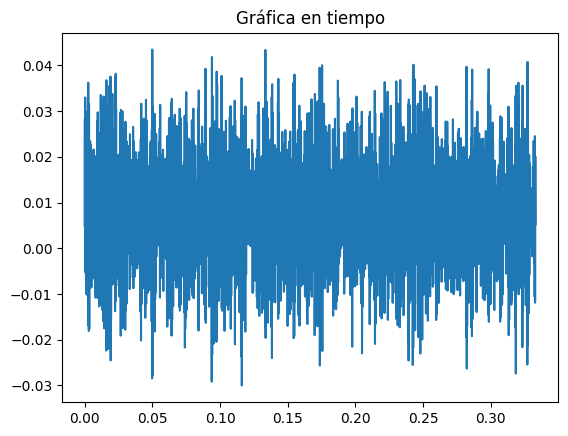

In [7]:
XT = np.mean(Xtrain,axis=0) #Promedio de las señales
vt = np.linspace(0,0.333,4000) #Vector tiempo
plt.plot(vt,XT)
plt.title('Gráfica en tiempo')

In [9]:
#Cálculo de las transformadas rapidas de Fourier (FFT)
vf = np.fft.rfftfreq(Xtrain.shape[1],1/Fs) #vector frecuencias para Xtrain
Xw = np.fft.rfft(Xtrain) # FFT de Xtrain

vf2 = np.fft.rfftfreq(Xtest.shape[1],1/Fs) #Vector frecuencias para Xtest
Xw2 = np.fft.rfft(Xtest) # FFT de Xtest

Gráfica de la señal promedio respecto a la potencia.

Para la gráfica de la señal promedio en frecuencia, se tomaron los valores de la FFT de Xtrain almacenados en Xw y se promediaron con np.mean para obtener una sola señal promedio con 2001 muestras.

Text(0.5, 1.0, 'Gráfica en frecuencia')

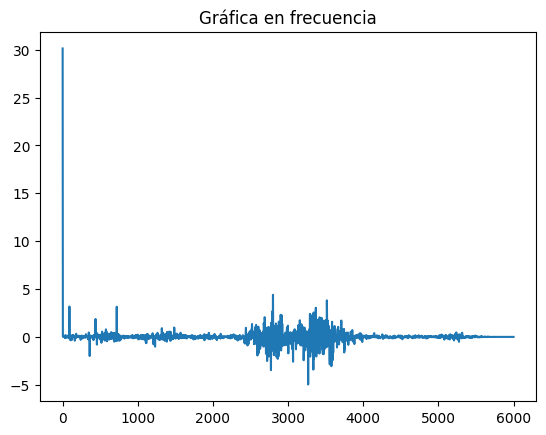

In [10]:
XF = np.mean(Xw,axis=0)
plt.plot(vf,XF)
plt.title('Gráfica en frecuencia')

In [12]:
#Normalizacion de las señales
Xw = Xw/np.sqrt(np.sum(Xw**2))
Xw2 = Xw2/np.sqrt(np.sum(Xw2**2))

Detector:
Desde que se hizo la división de datos y se habló de predicciones, debemos ingresar la base de datos Xtrain junto con sus etiquetas Ytrain para generar un modelo de detección para el posterior ingreso de los Xtest.
Se hizo una búsqueda en internet y se llegó a la conclusión de utilizar una red neuronal para predicciones.

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l1, l2

# Datos entrenamiento
DE = Xw

# Datos salida
DS = Ytrain

model = Sequential()
model.add(Dense(840, activation='relu',kernel_regularizer=l1(0.01)))
#model.add(Dense(210, activation='sigmoid'))
#model.add(Dropout(0.5))
model.add(Dense(10, activation='relu',kernel_regularizer=l2(0.01))) #10 clases

model.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(DE, DS, epochs=1000)

# evaluamos el modelo
scores = model.evaluate(DE, DS)

Epoch 1/1000


27/27 [==============================] - 6s 4ms/step - loss: 254.7272 - accuracy: 0.1000
Epoch 2/1000
27/27 [==============================] - 0s 4ms/step - loss: 57.3617 - accuracy: 0.0976
Epoch 3/1000
27/27 [==============================] - 0s 4ms/step - loss: 18.9089 - accuracy: 0.0976
Epoch 4/1000
27/27 [==============================] - 0s 4ms/step - loss: 11.5764 - accuracy: 0.0976
Epoch 5/1000
27/27 [==============================] - 0s 4ms/step - loss: 11.0292 - accuracy: 0.1012
Epoch 6/1000
27/27 [==============================] - 0s 4ms/step - loss: 10.9500 - accuracy: 0.1012
Epoch 7/1000
27/27 [==============================] - 0s 4ms/step - loss: 10.9216 - accuracy: 0.1024
Epoch 8/1000
27/27 [==============================] - 0s 4ms/step - loss: 10.8984 - accuracy: 0.0976
Epoch 9/1000
27/27 [==============================] - 0s 4ms/step - loss: 10.8687 - accuracy: 0.1024
Epoch 10/1000
27/27 [==============================] - 0s 4ms/step - loss: 10.8324 - accuracy: 0.1048
E

27/27 [==============================] - 0s 3ms/step - loss: 10.1677 - accuracy: 0.0964


In [14]:
predictions = model.predict(Xw2).round()
print (predictions)

12/12 [==============================] - 0s 3ms/step
[[6. 6. 6. ... 6. 6. 6.]
 [6. 6. 6. ... 6. 6. 6.]
 [6. 6. 6. ... 6. 6. 6.]
 ...
 [6. 6. 6. ... 6. 6. 6.]
 [6. 6. 6. ... 6. 6. 6.]
 [6. 6. 6. ... 6. 6. 6.]]


In [15]:
binary_predictions = (predictions > scores[1]*100).astype(int)
#print (binary_predictions)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


accuracy: 9.64%


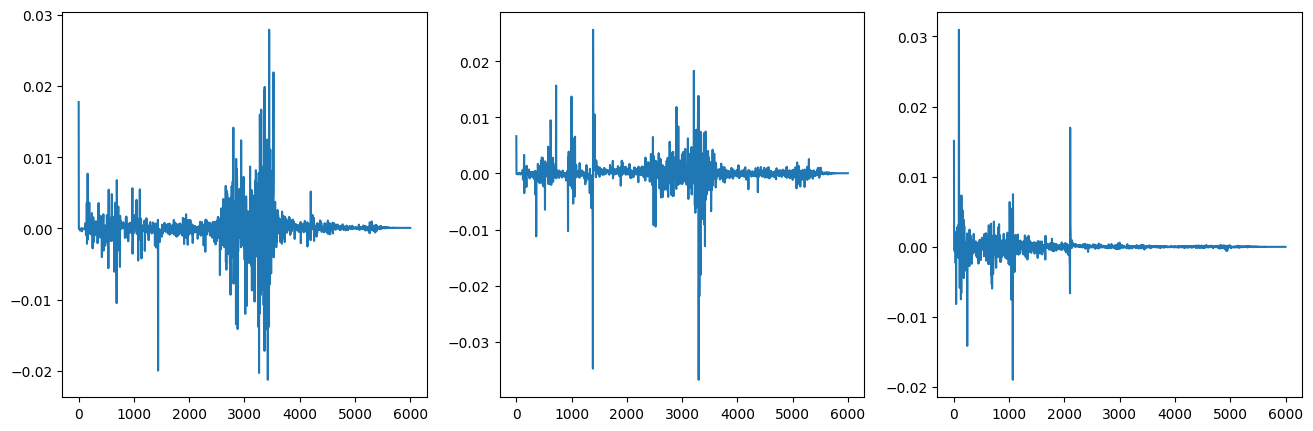

In [16]:
plt.figure(figsize=(16,5))

plt.subplot(131)
plt.plot(vf,Xw[71]) #fallo 6

plt.subplot(132)
plt.plot(vf,Xw[57]) #fallo 6

plt.subplot(133) #fallo 9
plt.plot(vf,Xw[95])

plt.show()

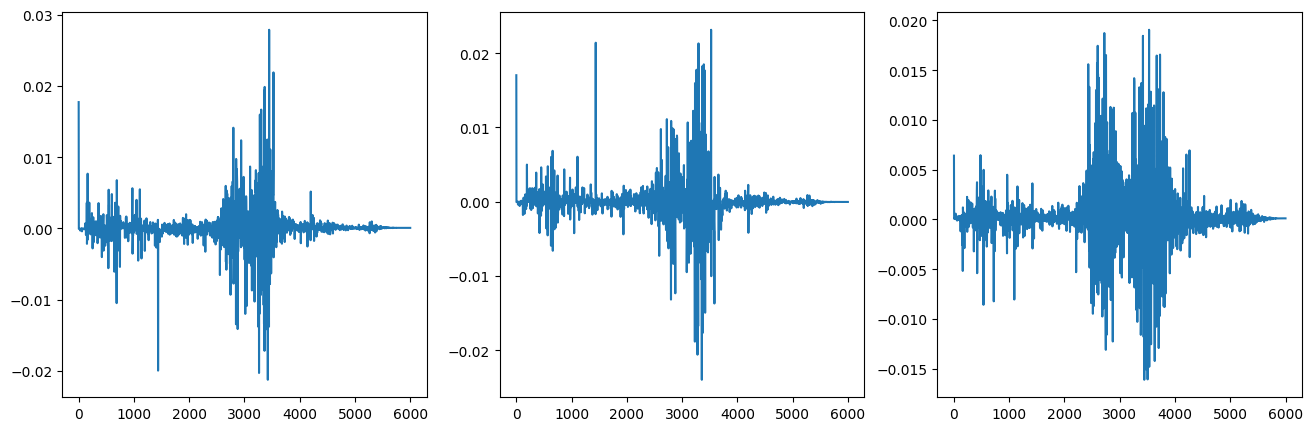

In [17]:
plt.figure(figsize=(16,5))

plt.subplot(131)
plt.plot(vf,Xw[71]) #fallo 6

plt.subplot(132)
plt.plot(vf,Xw[76]) #fallo 9

plt.subplot(133) #fallo 9
plt.plot(vf,Xw[78])

plt.show()


> Se llegó a este punto, las señales son similares, lo que resultaba en la obtención de los mismos resultados. La precisión se obtuvo en alrededor del 10%, ya que solo lograba detectar seis de los diez tipos de errores existentes. En ciertos momentos esta cifra aumentó a 12% o un poco más pero llegaba un punto en el que se estancaba. Para obtener respuestas más precisas se necesitan técnicas más avanzadas en el tratamiento de datos y señales.



